In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE




In [211]:
file_path = '/Users/steven.souksavath/Downloads/Archive (4)/train.csv'
df = pd.read_csv(file_path, delimiter=';')

In [212]:
file_path2 = '/Users/steven.souksavath/Downloads/Archive (4)/test.csv'
test_df = pd.read_csv(file_path2, delimiter=';')

For our initial observations before analysis to train out model, we will explore potential patterns and key factors within the dataset

In [213]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [214]:
#Check overall shape of the dataframe
df.shape

(45211, 17)

In [215]:
#Check Data ranges for the numerical columns 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [217]:
#Ensure there are no null values within the dataset
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [218]:
#The outcome variable is currently interpreted as a string, will format to a binary numeral value with (0 : 'No' and 1 : Yes)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

## Exploratory Data Analysis (EDA)

We will further examine specifically elements of each column to determine their relevance in accordance to having an overall effect on our outcome variable being customers who have subscribed to a term deposit.

INITIAL GROUP BY OBSERVATIONS

In [219]:
#Single people have highest chance of subscribing
df.groupby(['marital'], as_index=False)['y'].mean()

,marital,y
0,divorced,0.119455
1,married,0.101235
2,single,0.149492


CHARTS AND VISUAL OBSERVATIONS

In [220]:
#Isolating users who have subscribed to observe potential similarities users would have when subscribing
sub_df = df[df['y'] == 1]
notsubbed = df[df['y'] == 0]

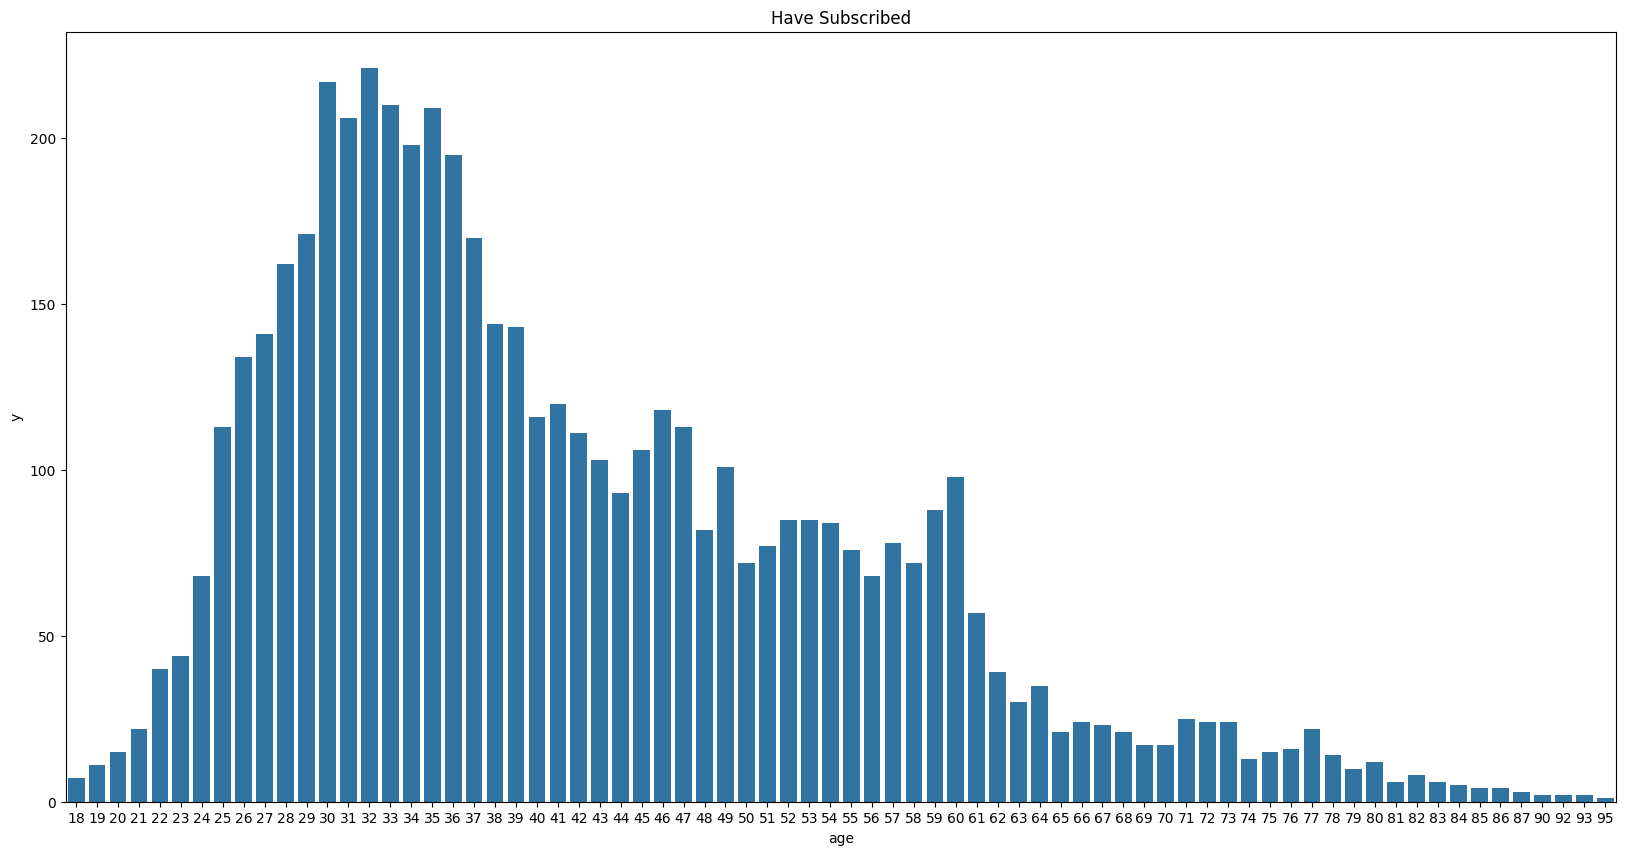

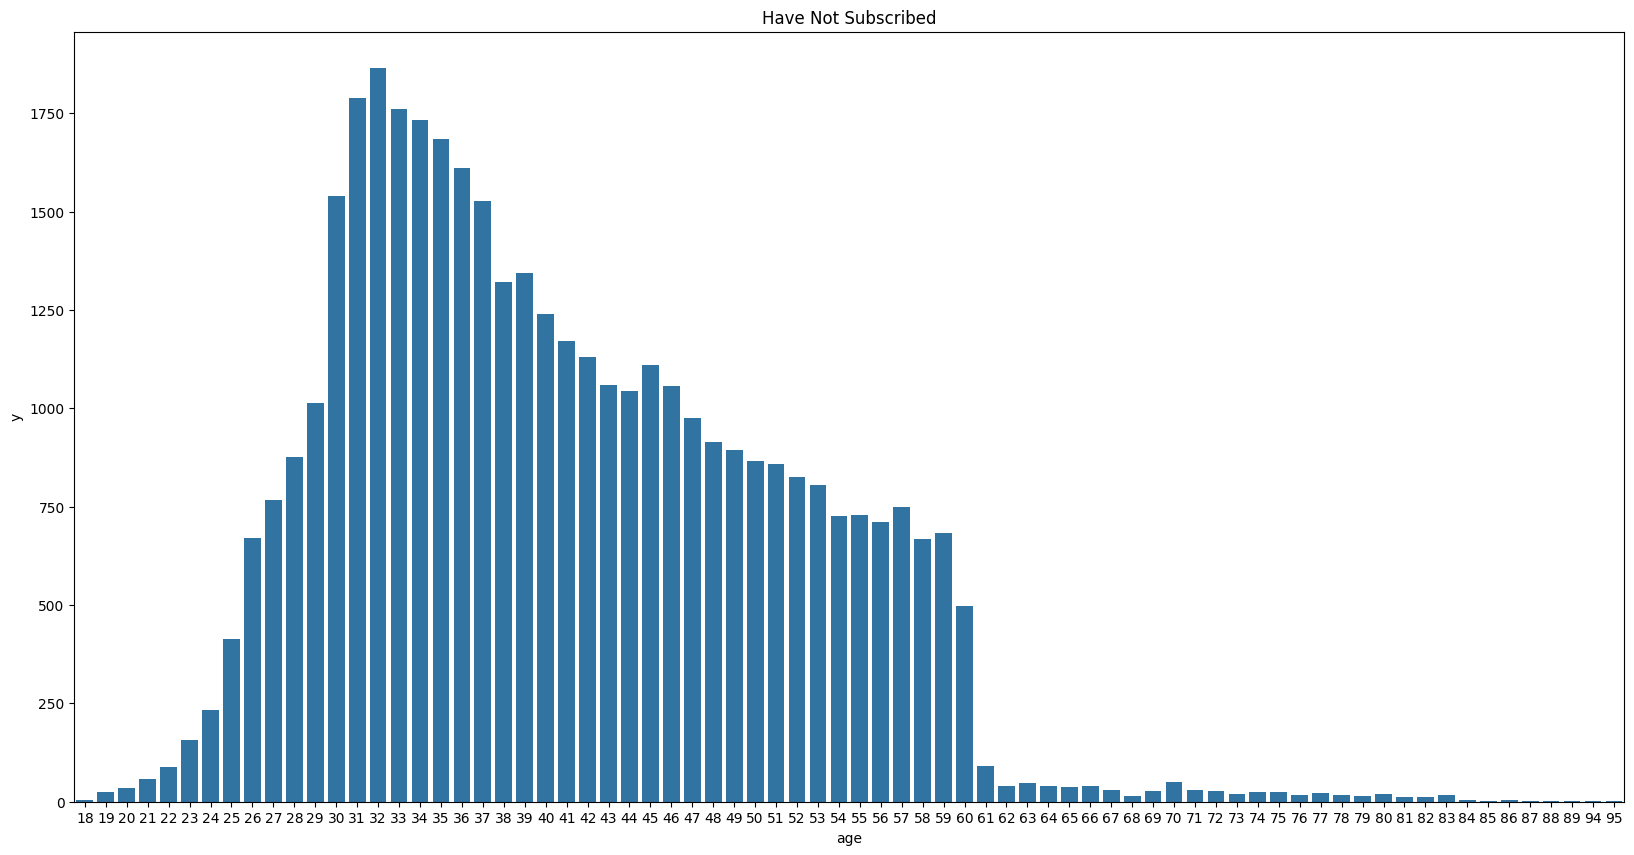

In [221]:
sub_age = sub_df.groupby('age')

# generate bar plot for how many customers have subscribed per age

plt.figure(figsize=(20,10))
sns.barplot(x=sub_age['y'].sum().index, y=sub_age['y'].sum())
plt.title("Have Subscribed")
plt.show()


# check for people who have not subscribed
notsubbed_Age = notsubbed.groupby('age')
# using count here since sum of all who have not subscribed would be 0
plt.figure(figsize=(20,10))
sns.barplot(x=notsubbed_Age['y'].count().index, y=notsubbed_Age['y'].count())
plt.title("Have Not Subscribed")
plt.show()

From the charts above, we can observe observations for those who have subscribed and not subscribed are relatively positively skewed

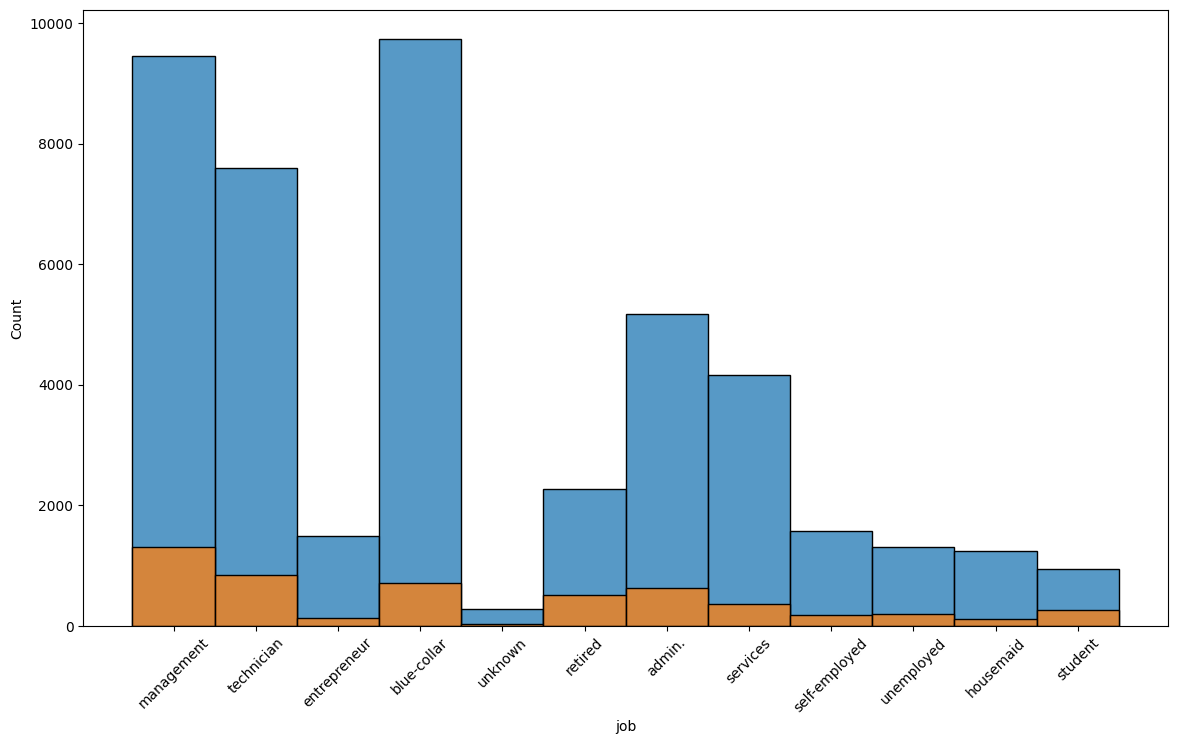

In [222]:
#It seems majority of customers who subscribed to a term deposit most commonly had the occupation as a manager, technician, admin, or blue-coller

plt.figure(figsize=(14,8))
sns.histplot(x=df['job'])
sns.histplot(x=sub_df['job'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='marital', ylabel='Count'>

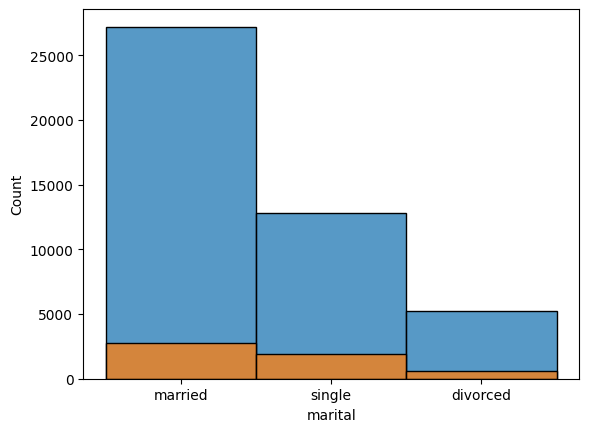

In [223]:
#Those who have subscribed are also observed that they are individuals who are married.

sns.histplot(x=df['marital'])
sns.histplot(x=sub_df['marital'])

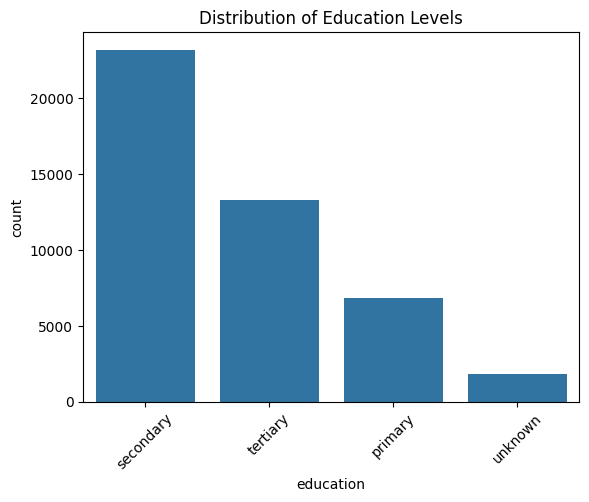

In [224]:
df_education_counts = df['education'].value_counts().reset_index()
df_education_counts.columns = ['education', 'count']

# Plot
sns.barplot(x='education', y='count', data=df_education_counts)
plt.xticks(rotation=45) 
plt.title('Distribution of Education Levels')
plt.show()

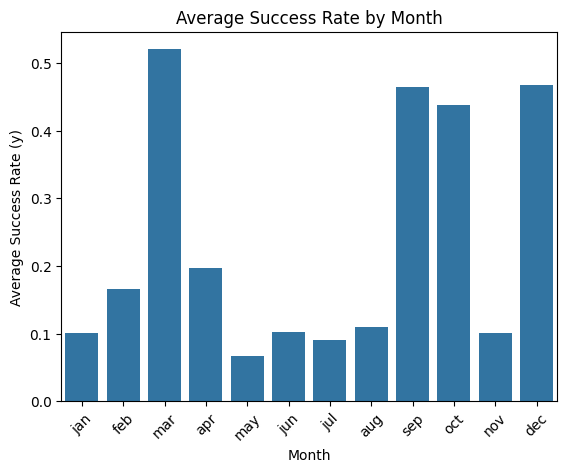

In [225]:
#Checking to see the average success rate each month for customers who have subscribed

month_success_rate = df.groupby(['month'], as_index=False)['y'].mean()


month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_success_rate['month'] = pd.Categorical(month_success_rate['month'], categories=month_order, ordered=True)
month_success_rate = month_success_rate.sort_values('month')

# Plot using seaborn
sns.barplot(x='month', y='y', data=month_success_rate)
plt.xlabel('Month')
plt.ylabel('Average Success Rate (y)')
plt.title('Average Success Rate by Month')
plt.xticks(rotation=45)  
plt.show()

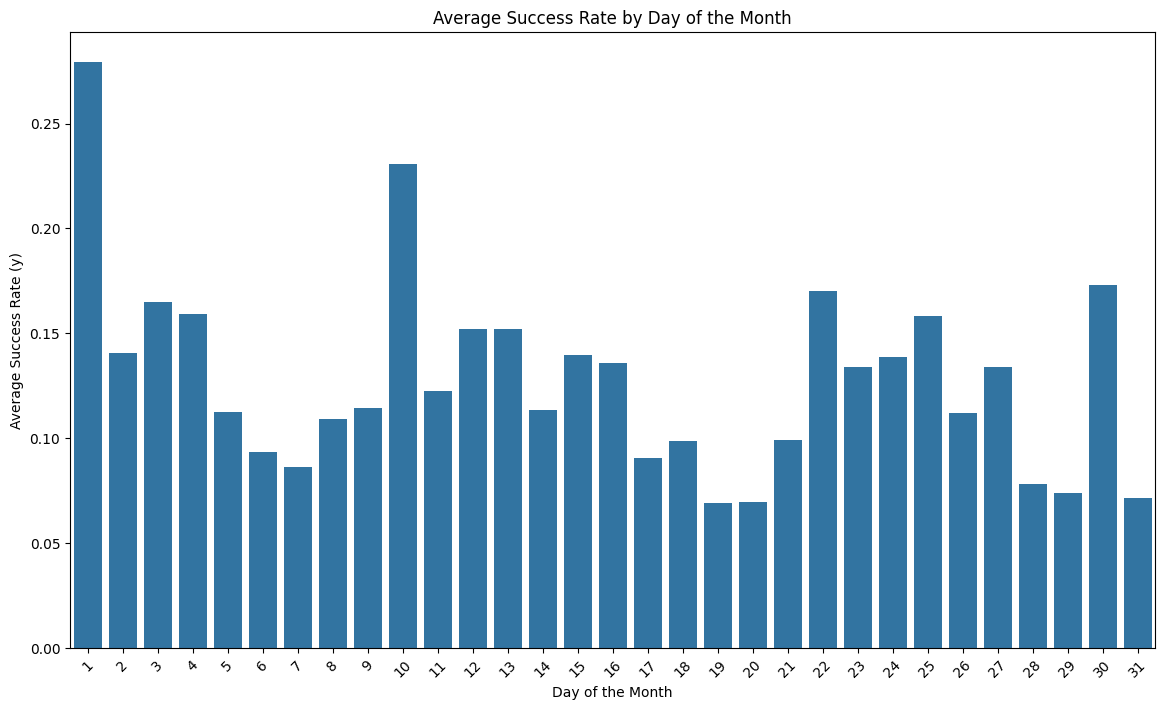

In [226]:
#Now observing if there is a specific day where customers tend to subscribe to term deposits, it seems the first and the 10th see the highest rate of success

day_success_rate = df.groupby(['day'], as_index=False)['y'].mean()
plt.figure(figsize=(14,8))
sns.barplot(x='day', y='y', data=day_success_rate)

plt.xlabel('Day of the Month')
plt.ylabel('Average Success Rate (y)')
plt.title('Average Success Rate by Day of the Month')
plt.xticks(rotation=45)  
plt.show()

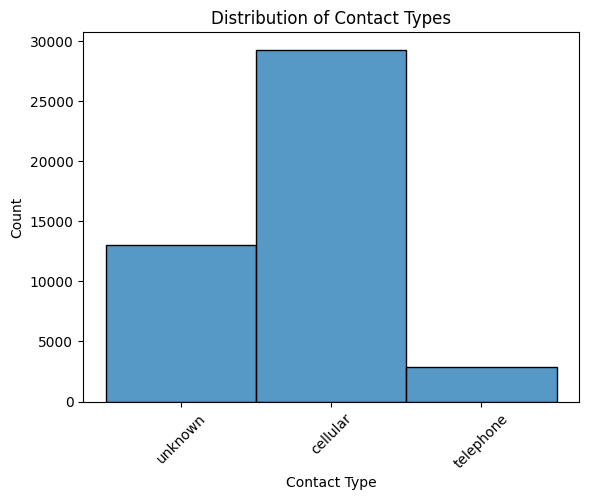

In [227]:
sns.histplot(df['contact'])

# Customize the plot
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.title('Distribution of Contact Types')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

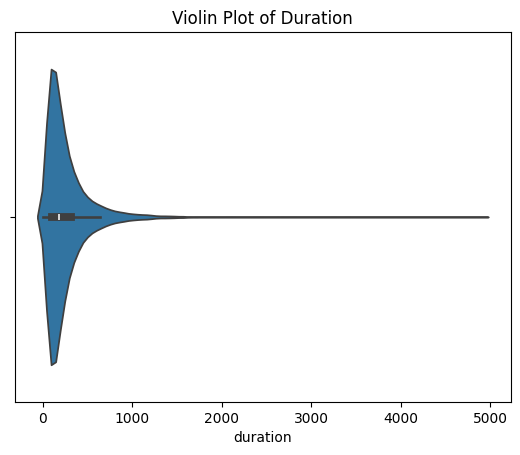

In [228]:
sns.violinplot(x=df['duration'])
plt.title('Violin Plot of Duration')
plt.show()

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_79430/1139628751.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['duration'], shade=True)


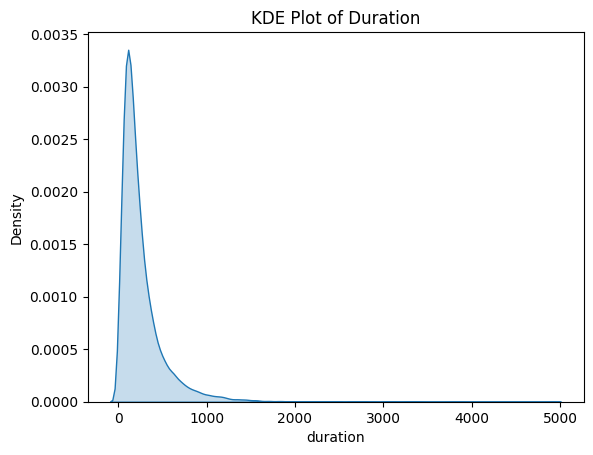

In [229]:
#Kde plot reveals majority of the observations between -1 to around 800 seconds in duration with large outliers included.

sns.kdeplot(df['duration'], shade=True)
plt.title('KDE Plot of Duration')
plt.show()

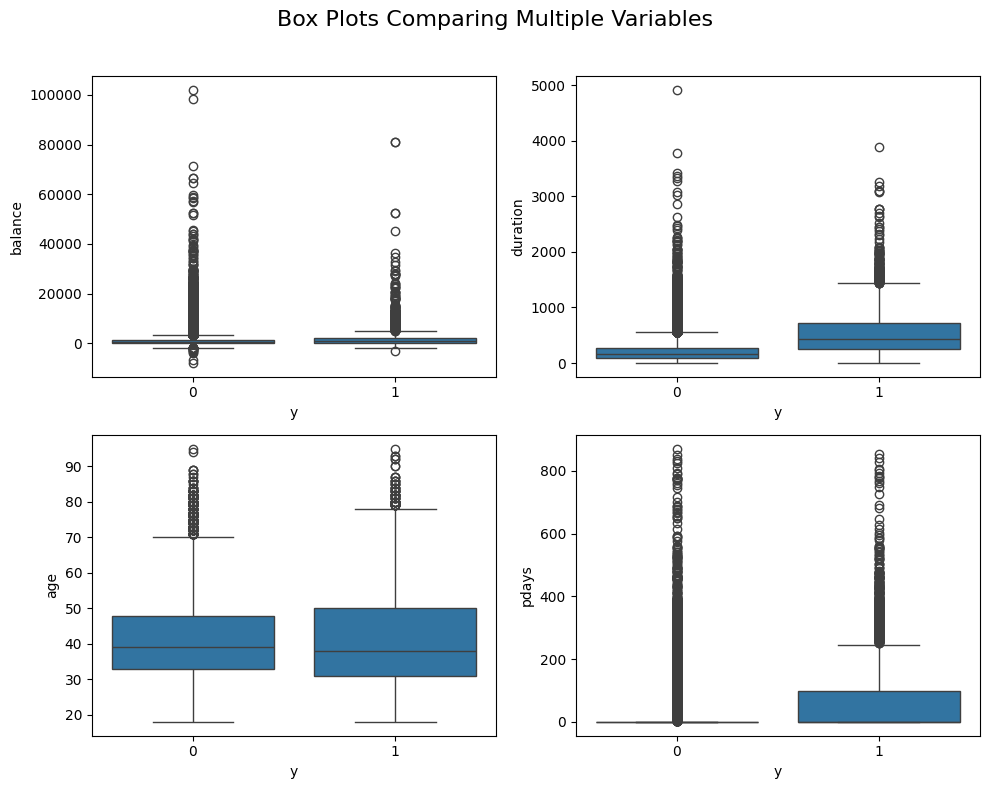

In [230]:
#More plots for the users that have subscribed - comparison using boxplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

fig.suptitle('Box Plots Comparing Multiple Variables', fontsize=16)

sns.boxplot(x='y', y='balance', data=df, ax=ax1)
sns.boxplot(x='y', y='duration', data=df, ax=ax2)
sns.boxplot(x='y', y='age', data=df, ax=ax3)
sns.boxplot(x='y', y='pdays', data=df, ax=ax4)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [231]:
#Label encoder to categorize them in a numerical output instead of strings. This can allow for better interpretability with our future models

labelecoder = LabelEncoder()

enc_df = df.copy()

encoding_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for col in encoding_col:
    enc_df[col] = labelecoder.fit_transform(enc_df[col])

enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0


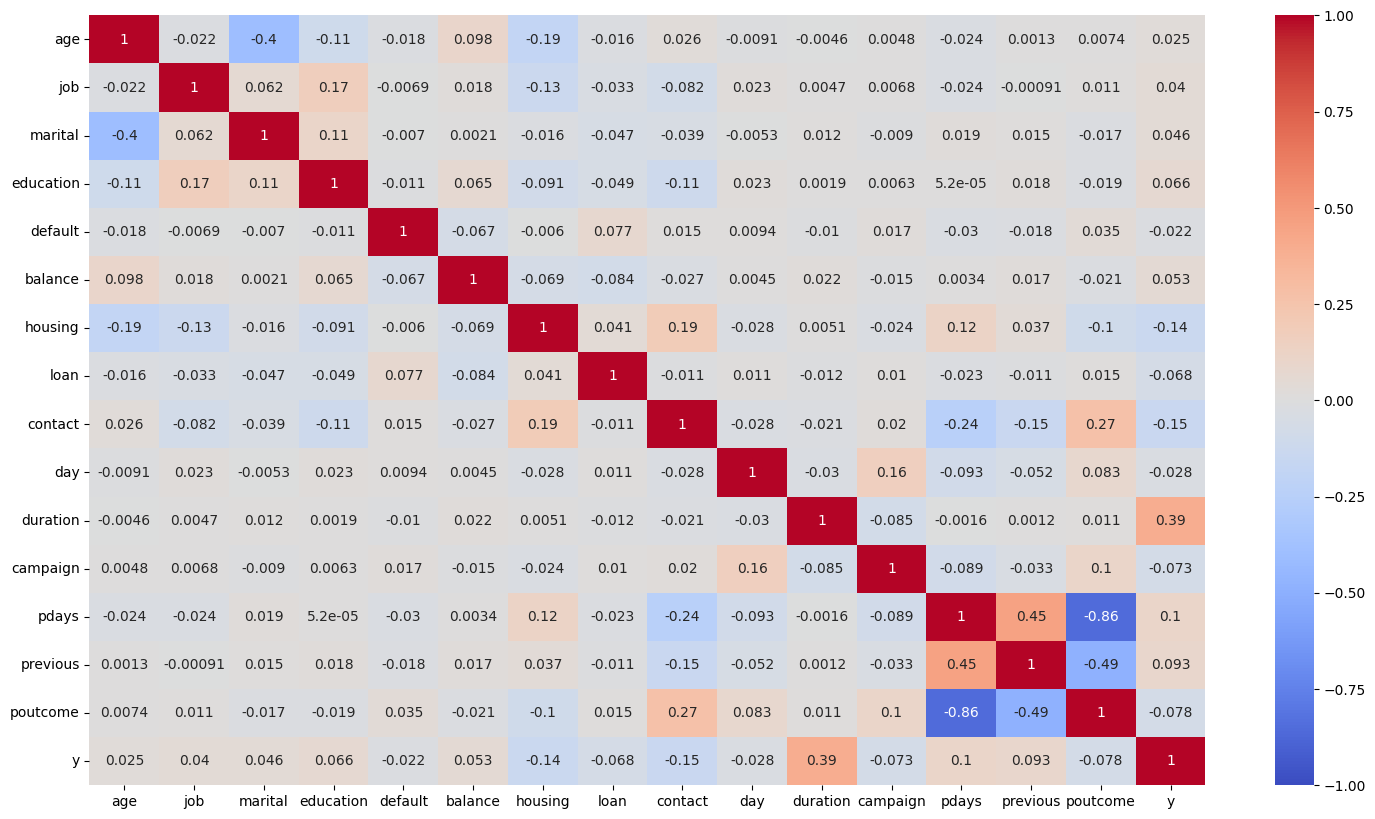

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_79430/4099975737.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')


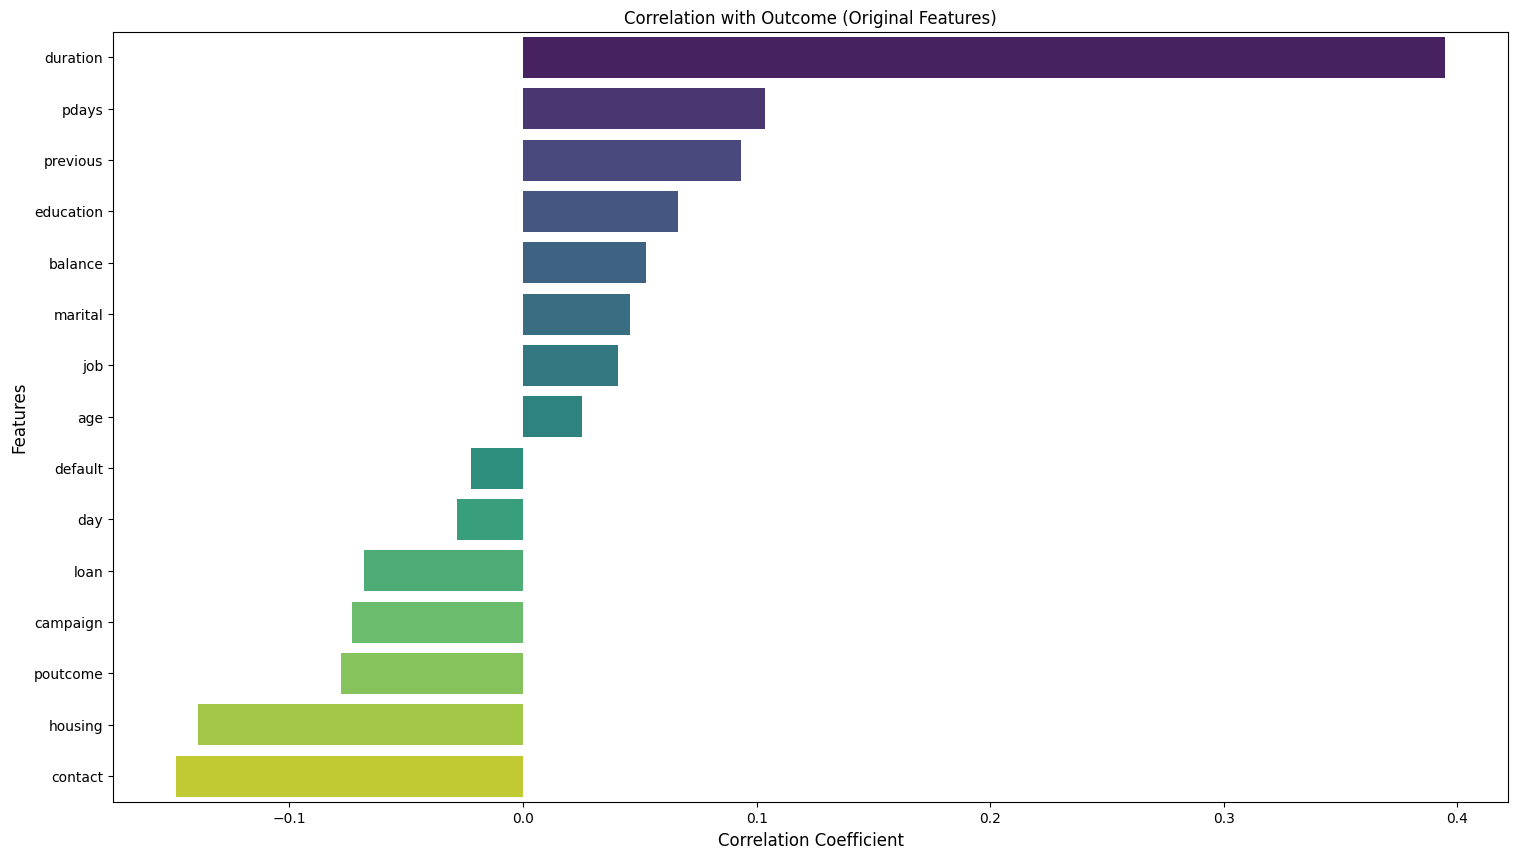

In [232]:
# Correlation matrix and heatmap with the multiple encoded variables

corr_matrix = enc_df.corr(numeric_only=True)
sub_corr = corr_matrix['y'].drop('y').sort_values(ascending=False)

#Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

#Correlation Matrix
plt.figure(figsize=(18,10))
sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')
plt.title('Correlation with Outcome (Original Features)')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

Duration seems to have the highest correlation with the outcome variable with pdays and previous having the next largest positive correlation. Balance and pdays could be less of a factor once outliers have been dealt with.

Contact and housing have the largest negative correlations with the outcome variable. This would potentially insuinate the method of which the customer is receiving the campaign or if they have a mortgage of not could have opposing effects on if they buy a term deposit or not.

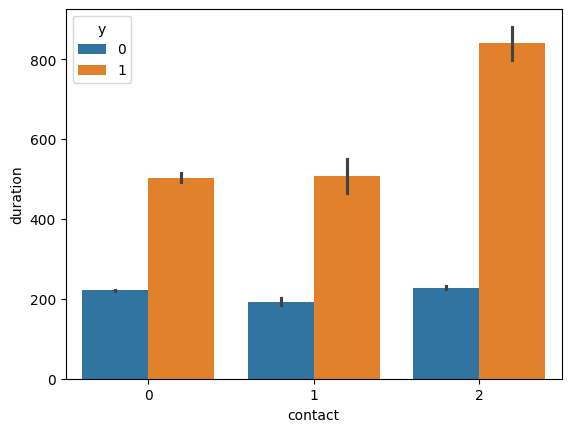

In [233]:
#Going to further explore the duration, contact, and housing variables

sns.barplot(x='contact', y='duration', hue='y', data=enc_df)
plt.show()

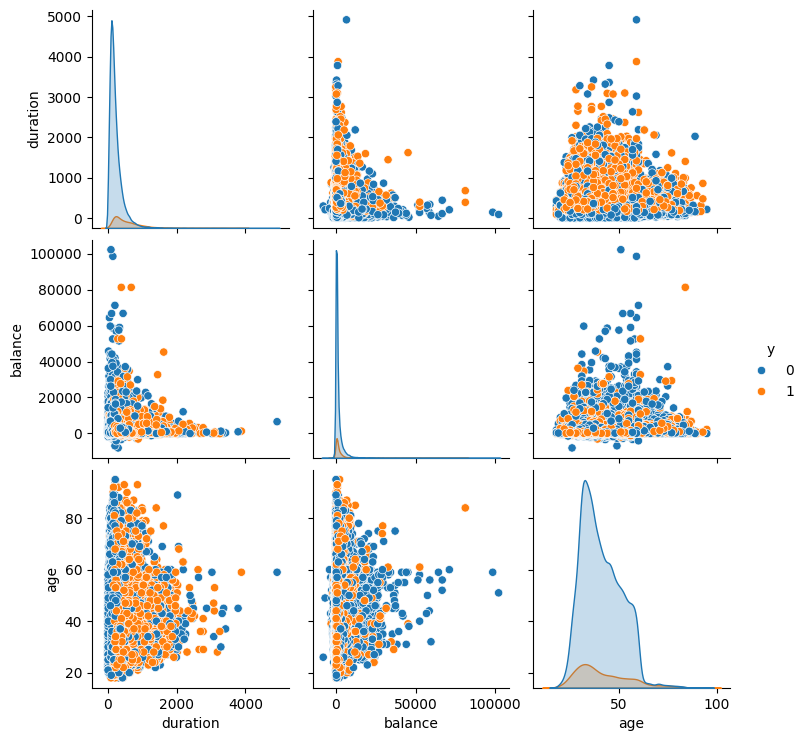

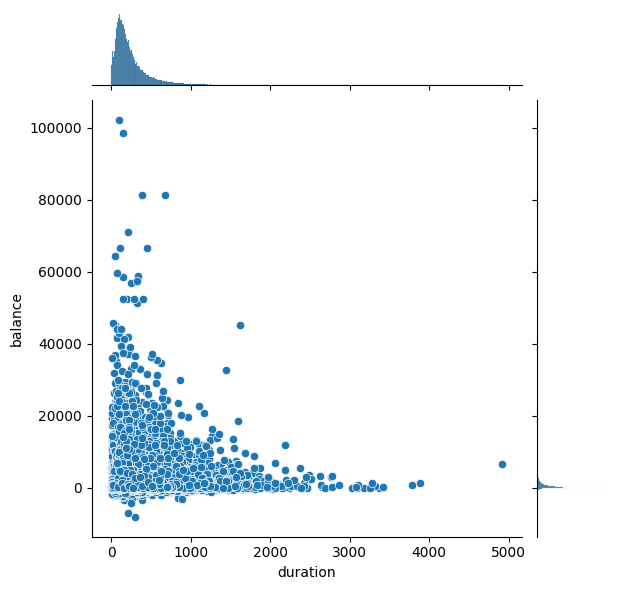

In [234]:
#Scatter and pair plot to spot any patterns within the observations
sns.pairplot(enc_df[['duration', 'balance', 'age', 'y']], hue='y')
sns.jointplot(x='duration', y='balance', data=enc_df, kind='scatter')

## Feature Engineering

Converting the Day and Month column to its own datetime feature, adding a year column into the dataframe
Convert the continuous variable of "Balance" into a categorical variable
Bin the duration column
Changing the age variable into a categorical as well.

In [235]:
enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0


In [236]:
#Change age into bins
enc_df['age_cut'] = pd.qcut(enc_df['age'], 6)


In [237]:
#Individuals aged 52+ and under 31 were most likely to subscribe to a term deposit
enc_df.groupby(['age_cut'], as_index=False)['y'].mean()

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_79430/4022047265.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enc_df.groupby(['age_cut'], as_index=False)['y'].mean()


,age_cut,y
0,"(17.999, 31.0]",0.149679
1,"(31.0, 35.0]",0.106332
2,"(35.0, 39.0]",0.101007
3,"(39.0, 45.0]",0.087691
4,"(45.0, 52.0]",0.092045
5,"(52.0, 95.0]",0.155373


In [238]:
#Create a new year column and aggregating to create a Date/Time Function

year = 2008
years = []

# Loop through each row of the DataFrame -- Understand how this works
for index, row in df.iterrows():
    # If the month is 'dec', assign the current year and then increment for the next rows
    if row['month'] == 'dec' and index > 0 and df.iloc[index - 1]['month'] != 'dec':
        years.append(year)
        year += 1
    else:
        years.append(year)

enc_df['year'] = years

enc_df['date'] = pd.to_datetime(df['day'].astype(str) + '-' + enc_df['month'] + '-' + enc_df['year'].astype(str), format='%d-%b-%Y') 
enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut,year,date
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0,"(52.0, 95.0]",2008,2008-05-05
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0,"(39.0, 45.0]",2008,2008-05-05
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0,"(31.0, 35.0]",2008,2008-05-05
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0,"(45.0, 52.0]",2008,2008-05-05
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0,"(31.0, 35.0]",2008,2008-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1,"(45.0, 52.0]",2010,2010-11-17
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1,"(52.0, 95.0]",2010,2010-11-17
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1,"(52.0, 95.0]",2010,2010-11-17
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0,"(52.0, 95.0]",2010,2010-11-17


In [239]:
#Creating Duration into quantiles

enc_df['duration_bin'] = pd.qcut(enc_df['duration'], q=5, labels=False)
enc_df.groupby(['duration_bin'], as_index=False)['y'].mean()


,duration_bin,y
0,0,0.007249
1,1,0.037201
2,2,0.079318
3,3,0.130551
4,4,0.331710


In [240]:
enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_cut,year,date,duration_bin
0,58,4,1,2,0,2143,1,0,2,5,...,261,1,-1,0,3,0,"(52.0, 95.0]",2008,2008-05-05,3
1,44,9,2,1,0,29,1,0,2,5,...,151,1,-1,0,3,0,"(39.0, 45.0]",2008,2008-05-05,2
2,33,2,1,1,0,2,1,1,2,5,...,76,1,-1,0,3,0,"(31.0, 35.0]",2008,2008-05-05,0
3,47,1,1,3,0,1506,1,0,2,5,...,92,1,-1,0,3,0,"(45.0, 52.0]",2008,2008-05-05,1
4,33,11,2,3,0,1,0,0,2,5,...,198,1,-1,0,3,0,"(31.0, 35.0]",2008,2008-05-05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,...,977,3,-1,0,3,1,"(45.0, 52.0]",2010,2010-11-17,4
45207,71,5,0,0,0,1729,0,0,0,17,...,456,2,-1,0,3,1,"(52.0, 95.0]",2010,2010-11-17,4
45208,72,5,1,1,0,5715,0,0,0,17,...,1127,5,184,3,2,1,"(52.0, 95.0]",2010,2010-11-17,4
45209,57,1,1,1,0,668,0,0,1,17,...,508,4,-1,0,3,0,"(52.0, 95.0]",2010,2010-11-17,4


## Model Building

In [241]:
categorical = ['housing', 'contact']
numerical = ['duration', 'pdays', 'previous', 'year']

target = ['y']

X_train, X_test, y_train, y_test = train_test_split(enc_df[categorical + numerical], enc_df[target], test_size=0.3, random_state=42)

In [242]:
#Preprocessing pipeline

catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, categorical), ('num', numTransformer, numerical)])

In [243]:
#Logistic regression Model - Basic

logreg = Pipeline(steps=[('preprocessor', preprocessor), ('logistic', LogisticRegression())])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

Accuracy:  0.8998083161309348
Precision:  0.6530089628681178
Recall:  0.3191489361702128
F1:  0.4287515762925599


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results are quite low given the varibles fed into the model. Precision is lackluster leading to only a 60% amount of True positives the model is predicting. Recall is very low (31%) which signifies the model is predicting a high amount of false negatives. For the business this would be costly due to the model not being able to identify target users who would subscribe to the term deposit and therefore it would have a direct impact on revenue. In order for this model to be efficient, Recall should be prioritized and increased to minimize the volume of false negatives to capture as many subscribers at possible, even if its at a cost of allowing some false positives.

In [244]:
# Parameter tuning and grid search for Logistic Regression

param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2', 'elasticnet'],
    'logistic__solver': ['saga']  # saga solver supports l1, l2, and elasticnet
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Best hyperparameters for Logistic Regression: {'logistic__C': 10, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


In [245]:
#Final pipeline for Logistic 

logreg = Pipeline(steps= [('preprocessor', preprocessor), ('logistic', LogisticRegression(C=100, penalty='l1', solver='saga'))])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_logreg_grid = classification_report(y_test, pred)
print(report_logreg_grid)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8998083161309348
Precision: 0.638150289017341
Recall Score: 0.3454317897371715
F1 Score: 0.4482338611449452


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/s

Cross Validation F1 Scores: [0.42446043 0.40143369 0.42307692 0.40837696 0.42424242 0.38857143
 0.4368231  0.43928571 0.47140381 0.47602131]
Mean cross validation F1 Score: 0.4293695808843533
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.64      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [246]:
#KNN model - Basic

knn = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier())])

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.8920672368033029
Precision:  0.553343949044586
Recall:  0.434918648310388
F1:  0.48703573931324456


In [247]:
#Parameter tuning and Grid Search for KNN

param_grid = {
    'knn__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWa

Best hyperparameters for KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'knn__weights': 'uniform'}


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [248]:
#Final Pipeline for KNN

knn = Pipeline(steps= (['preprocessor', preprocessor], ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance'))))

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_knn_grid = classification_report(y_test, pred)
print(report_knn_grid)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.8896343261574756
Precision:  0.5386973180076629
Recall:  0.4399249061326658
F1:  0.48432655873234587


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWa

Cross Validation F1 Scores: [0.44929797 0.45259939 0.44807122 0.45074627 0.49632893 0.4760479
 0.44690967 0.48361934 0.48955224 0.49621785]
Mean cross validation F1 Score: 0.4689390780325094
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11966
           1       0.54      0.44      0.48      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.69      0.71     13564
weighted avg       0.88      0.89      0.88     13564



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [249]:
#Random Forest - Basic

rf = Pipeline(steps=[('preprocessor', preprocessor), ('rf', RandomForestClassifier())])

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy:  0.8892657033323503
Precision:  0.5352941176470588
Recall:  0.4555694618272841
F1:  0.49222447599729546


In [250]:
#Random Forest Parameter tuning and grid search

# Define hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A co

Best hyperparameters for Random Forest: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}


In [251]:
# Final Random Forest Pipeline

rf = Pipeline(steps = (['preprocessor', preprocessor], ('rf', RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100))))

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_rf_grid = classification_report(y_test, pred)
print(report_rf_grid)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversio

Cross Validation F1 Scores: [0.44929797 0.45259939 0.44807122 0.45074627 0.49632893 0.4760479
 0.44690967 0.48361934 0.48955224 0.49621785]
Mean cross validation F1 Score: 0.4689390780325094
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.63      0.43      0.51      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.89      0.90      0.90     13564



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [252]:
#AdaBoost - Basic

ada = Pipeline(steps=[('preprocessor', preprocessor), ('ada', AdaBoostClassifier())])

ada.fit(X_train, y_train)
pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.8918460631082277
Precision:  0.5696068012752391
Recall:  0.3354192740926158
F1:  0.42221346987002756


In [253]:
#Grid search and parameter tuning for Adaboost model

param_grid = {
    'ada__n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'ada__learning_rate': [0.01, 0.1, 1, 1.5],  # Learning rate controls the contribution of each weak learner
    'ada__algorithm': ['SAMME', 'SAMME.R']  # Different boosting algorithms
}

ada = Pipeline(steps=[('preprocessor', preprocessor), ('ada', AdaBoostClassifier())])

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding best score
print("Best Parameters: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Best Parameters:  {'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1.5, 'ada__n_estimators': 100}
Best F1 Score:  0.43781537760252043


In [254]:
#Final pipeline for Ada boost with best params

ada = Pipeline(steps = (['preprocessor', preprocessor], ('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.5, n_estimators=100))))

ada.fit(X_train, y_train)
pred = ada.predict(X_test)

crossVal = cross_val_score(ada, X_train, y_train, cv = 10, scoring = 'f1')

print('Cross Validation F1 Scores: ', crossVal)
print('Mean Cross Validation F1 Scores', np.mean(crossVal))

report_ada_grid = classification_report(y_test, pred)
print(report_ada_grid)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algor

Cross Validation F1 Scores:  [0.40202703 0.40695652 0.4534687  0.43551089 0.47635135 0.43233743
 0.41052632 0.43523316 0.44630872 0.43432574]
Mean Cross Validation F1 Scores 0.4333045864659807
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.60      0.34      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



Ada boost after parameter tuning had the second best score in comparison to the Random Forest Classifier. Precision increased by 1 and recall had the same value. Having similar performance to the Random Forest model, the overall feedback would be the AdaBoost was much more efficient in training the models and making predictions at a fraction of the time in comparison as well. 

AdaBoost took 30 seconds for grid search vs Random Forest where it took almost 10 minutes to process.

In [255]:
##Bagging model with decision tree classifier

# Replace 'base_estimator' with 'estimator'
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict using the test set
y_pred = bagging_clf.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     11966
           1       0.51      0.43      0.47      1598

    accuracy                           0.88     13564
   macro avg       0.72      0.69      0.70     13564
weighted avg       0.88      0.88      0.88     13564



In [256]:
#Grid search and hyper parameter tuning with Bagging classifer using the decision tree classifier - (Chosen because it was the best)

param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees
    'max_samples': [0.5, 1.0],      # Fraction of samples to draw for each base estimator
    'max_features': [0.5, 1.0],     # Fraction of features to draw for each base estimator
    'bootstrap': [True, False],     # Whether samples are drawn with or without replacement
    'estimator__max_depth': [3, 5, 10]  # Max depth of the decision tree
}

# Create a Bagging Classifier with a Decision Tree base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning

Best Hyperparameters: {'bootstrap': True, 'estimator__max_depth': 10, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best Score: 0.9031507164917277
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.63      0.45      0.52      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.71      0.73     13564
weighted avg       0.89      0.90      0.90     13564



In [257]:
# Voting Classifier - applying PCA and SMOTE

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    enc_df[categorical + numerical], enc_df[target], test_size=0.2, random_state=42
)

# Apply preprocessing to X_train
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE to the preprocessed training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

# Convert the SMOTE output back to a DataFrame with the correct column names
X_train_smote = pd.DataFrame(X_train_smote, columns=preprocessor.get_feature_names_out())

# Define the classifiers

# Bagging classifier with Decision Tree base estimator
base_estimator = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, class_weight='balanced')
bagging_clf = BaggingClassifier(
    estimator=base_estimator, 
    n_estimators=50, 
    max_samples=0.8, 
    max_features=0.8, 
    random_state=42
)

# Random Forest and KNN (no Logistic Regression)
rf_clf = RandomForestClassifier(class_weight='balanced')
knn_clf = KNeighborsClassifier()

# Define hyperparameter grids for KNN and Random Forest
knn_params = {'n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30, 50]}

In [258]:
# Random Forest and KNN (no Logistic Regression)
rf_clf = RandomForestClassifier(class_weight='balanced')
knn_clf = KNeighborsClassifier()

# Define hyperparameter grids for KNN and Random Forest
knn_params = {'n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30, 50]}

In [259]:
# Tuning Random Forest
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_smote, y_train_smote)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A co

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 10, 20, 30, 50],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [260]:
# Tuning KNN
knn_grid = GridSearchCV(knn_clf, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_smote, y_train_smote)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWa

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 20, 30, 50, 100]},
             scoring='accuracy')

In [261]:
# Using soft Voting
soft_voting_clf = VotingClassifier(estimators=[
    ('rf', rf_grid.best_estimator_),  # Tuned Random Forest
    ('knn', knn_grid.best_estimator_),  # Tuned KNN
    ('bag', bagging_clf)  # Bagging classifier
], voting='soft')  # Use soft voting

soft_voting_clf.fit(X_train_smote, y_train_smote)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     n_estimators=150)),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('bag',
                              BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                 max_depth=5,
                                                                                 min_samples_leaf=5,
                                                                                 min_samples_split=10),
                                                max_features=0.8,
                                                max_samples=0.8,
                                                n_estimators=50,
                                                random_state=42))],
                 voting='soft')

In [262]:
# Using hard Voting
hard_voting_clf = VotingClassifier(estimators=[
    ('rf', rf_grid.best_estimator_),  # Tuned Random Forest
    ('knn', knn_grid.best_estimator_),  # Tuned KNN
    ('bag', bagging_clf)  # Bagging classifier
], voting='hard')  # Use soft voting

hard_voting_clf.fit(X_train_smote, y_train_smote)

# Preprocess the test set before prediction
X_test_preprocessed = preprocessor.transform(X_test)

#Make predictions and display classification reports for soft voting
soft_y_pred = soft_voting_clf.predict(X_test_preprocessed)
print("Soft Voting Classifier Report:")
print(classification_report(y_test, soft_y_pred))

#Make predictions and display classification reports for hard voting
hard_y_pred = hard_voting_clf.predict(X_test_preprocessed)
print("Hard Voting Classifier Report:")
print(classification_report(y_test, hard_y_pred))


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was f

Soft Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7952
           1       0.44      0.76      0.56      1091

    accuracy                           0.86      9043
   macro avg       0.70      0.82      0.74      9043
weighted avg       0.90      0.86      0.87      9043

Hard Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      7952
           1       0.44      0.77      0.56      1091

    accuracy                           0.85      9043
   macro avg       0.70      0.82      0.74      9043
weighted avg       0.90      0.85      0.87      9043



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [263]:
### RANDOM FOREST WITH PCA AND SMOTE


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(enc_df[categorical + numerical], enc_df[target], test_size=0.3, random_state=42)


# Apply SMOTE on training data only
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# PCA for dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 components

# Define the random forest classifier
ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.5, n_estimators=100)

# Build the final pipeline (Preprocessing -> PCA -> Classifier)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('pca', pca),                    # Apply PCA
    ('ada', ada)                       # Use RandomForestClassifier
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the pipeline with cross-validation
cv_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')

# Print cross-validation scores
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean()}")

# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Test the model on the original test set
y_pred = pipeline.predict(X_test)

# Calculate metrics on test data
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Test F1 Score: {f1}")


# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Get predictions and scores for the training set
y_train_pred = pipeline.predict(X_train_resampled)
train_f1_score = f1_score(y_train_resampled, y_train_pred)
print(f"Training F1 Score: {train_f1_score:.4f}")

# Generate the classification report for the training set
train_report = classification_report(y_train_resampled, y_train_pred)
print("\nClassification Report (Training Set):")
print(train_report)

# Predict on the test set (without applying SMOTE to the test data)
y_test_pred = pipeline.predict(X_test)

# Generate the classification report on the test set
test_report = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):")
print(test_report)

# Calculate and print the F1 score on the test set
test_f1_score = f1_score(y_test, y_test_pred)
print(f"Test F1 Score: {test_f1_score:.4f}")

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algor

Cross-Validation F1 Scores: [0.78815019 0.78530694 0.78425958 0.79348009 0.77753341]
Mean CV F1 Score: 0.7857460423949734


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy: 0.8501916838690652
Test F1 Score: 0.5300647548566142


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training F1 Score: 0.7924

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     27956
           1       0.76      0.83      0.79     13978

    accuracy                           0.85     41934
   macro avg       0.83      0.85      0.84     41934
weighted avg       0.86      0.85      0.86     41934


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     11966
           1       0.42      0.72      0.53      1598

    accuracy                           0.85     13564
   macro avg       0.69      0.79      0.72     13564
weighted avg       0.89      0.85      0.87     13564

Test F1 Score: 0.5301
